# (prosperLoanData)
## by (Omar Sherif Mohamed)

## Investigation Overview

> My goal here is to find out the features (explanatory variables) that moslty affect the prosper score and prosper rating

## Dataset Overview

> The Prosper Loan Dataset consists of  113,937 loans (observations) with 81 variables on each 
loan, including loan amount, borrower rate (or interest rate), 
current loan status, borrower income, and many others. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
columns_interest=['Term','LoanStatus','BorrowerAPR','BorrowerRate','ProsperRating (numeric)','ProsperScore','EmploymentStatus','IsBorrowerHomeowner','OpenCreditLines','BankcardUtilization']
filtered_df=df[columns_interest]

In [4]:
filtered_df.dropna(inplace=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Term                     84853 non-null  int64  
 1   LoanStatus               84853 non-null  object 
 2   BorrowerAPR              84853 non-null  float64
 3   BorrowerRate             84853 non-null  float64
 4   ProsperRating (numeric)  84853 non-null  float64
 5   ProsperScore             84853 non-null  float64
 6   EmploymentStatus         84853 non-null  object 
 7   IsBorrowerHomeowner      84853 non-null  bool   
 8   OpenCreditLines          84853 non-null  float64
 9   BankcardUtilization      84853 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 6.6+ MB


C:\Users\twins\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
filtered_df.drop_duplicates(inplace=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83526 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Term                     83526 non-null  int64  
 1   LoanStatus               83526 non-null  object 
 2   BorrowerAPR              83526 non-null  float64
 3   BorrowerRate             83526 non-null  float64
 4   ProsperRating (numeric)  83526 non-null  float64
 5   ProsperScore             83526 non-null  float64
 6   EmploymentStatus         83526 non-null  object 
 7   IsBorrowerHomeowner      83526 non-null  bool   
 8   OpenCreditLines          83526 non-null  float64
 9   BankcardUtilization      83526 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 6.5+ MB


C:\Users\twins\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of EmploymentStatus)

> We can see in that figure that most of the employment status of people is Employed status as it has a proportion of about 80% from the overall Employment status

83526
0.7911668223068267


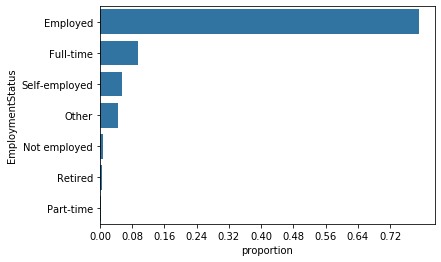

In [6]:
base_color = sb.color_palette()[0]

employmentStat = filtered_df['EmploymentStatus'].value_counts()
total_emp_stat = filtered_df['EmploymentStatus'].value_counts().sum()
print(total_emp_stat)
max_prop=employmentStat[0]/total_emp_stat
print(max_prop)
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data=filtered_df, y='EmploymentStatus',color=base_color,order=employmentStat.index);
plt.xticks(tick_props * total_emp_stat, tick_names)
plt.xlabel('proportion');


## (EmploymentStatus Vs ProsperScore)

> We can see that the Full time status has the largest prosper score median among all other status , We can see also that both full time and self-employed status have outliers 

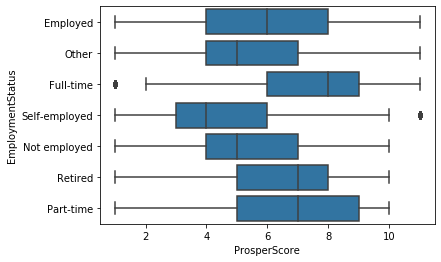

In [7]:
sb.boxplot(data=filtered_df, y='EmploymentStatus', x='ProsperScore', color=base_color);

## (ProsperScore Vs LoanStatus for each Term)
> We can conclude from the figure above that people with current loan status their average prosperscore increases when the term increases while people with completed loan status are exactly the opposite 


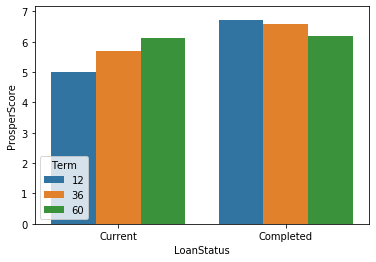

In [8]:
new_df=filtered_df.query('LoanStatus == "Current" or LoanStatus == "Completed"');
sb.barplot(data = new_df, x = 'LoanStatus', y = 'ProsperScore', hue = 'Term',errwidth=0);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!